In [1]:
import pandas as pd
import datetime
import csv
import re
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.data import Enrollments
from pyFTS.common import Transformations
from pyFTS.data import TAIEX
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
tdiff = Transformations.Differential(1)
dataset = TAIEX.get_data()
dataset_diff = tdiff.apply(dataset)

In [14]:
dataset

array([7092.71 , 6985.745, 6901.91 , ..., 8380.09 , 8479.855, 8469.235])

In [7]:
df = TAIEX.get_dataframe()
df.head(4)
df.to_csv("data/taiex_all.csv")

In [6]:
df.tail(10)

,Date,Openly,Highest,Lowermost,Close,Volume,avg
5250,2015-11-19,8382.09,8477.20,8357.20,8477.20,1.802003e+09,8417.200
5251,2015-11-20,8472.65,8484.06,8434.33,8465.45,1.592154e+09,8459.195
5252,2015-11-23,8472.24,8497.83,8436.72,8472.74,1.542516e+09,8467.275
5253,2015-11-24,8472.24,8497.83,8397.44,8400.14,1.660775e+09,8447.635
5254,2015-11-25,8411.16,8510.70,8411.16,8479.90,1.736365e+09,8460.930
5255,2015-11-26,8411.16,8510.70,8411.16,8484.90,1.678366e+09,8460.930
5256,2015-11-27,8493.18,8505.08,8397.49,8398.40,1.456662e+09,8451.285
5257,2015-11-30,8359.27,8420.68,8339.50,8414.84,3.452344e+09,8380.090
5258,2015-12-01,8475.96,8497.19,8462.52,8482.99,2.030303e+09,8479.855
5259,2015-12-02,8475.96,8497.19,8441.28,8457.40,1.952180e+09,8469.235


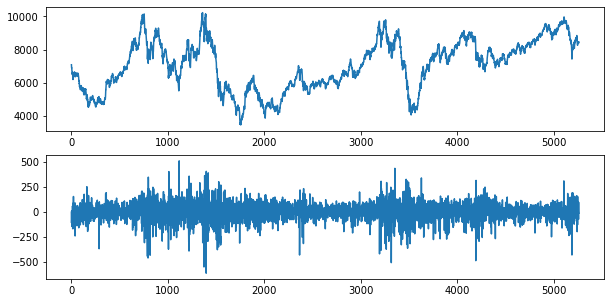

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10,5])
ax[0].plot(dataset)
ax[1].plot(dataset_diff)

In [5]:
fs = Grid.GridPartitioner(data=dataset, npart=20, func = mf.trimf)
print(fs)

Grid:
A0: trimf([2720.220125, 3126.4335, 3532.6468750000004])
A1: trimf([3126.4335, 3532.6468750000004, 3938.8602500000006])
A2: trimf([3532.6468750000004, 3938.8602500000006, 4345.073625000001])
A3: trimf([3938.8602500000006, 4345.073625000001, 4751.287000000001])
A4: trimf([4345.073625000001, 4751.287000000001, 5157.500375000001])
A5: trimf([4751.287000000001, 5157.500375000001, 5563.713750000002])
A6: trimf([5157.500375000001, 5563.713750000002, 5969.927125000002])
A7: trimf([5563.713750000002, 5969.927125000002, 6376.140500000002])
A8: trimf([5969.927125000002, 6376.140500000002, 6782.3538750000025])
A9: trimf([6376.140500000002, 6782.3538750000025, 7188.567250000003])
A10: trimf([6782.3538750000025, 7188.567250000003, 7594.780625000003])
A11: trimf([7188.567250000003, 7594.780625000003, 8000.994000000003])
A12: trimf([7594.780625000003, 8000.994000000003, 8407.207375000004])
A13: trimf([8000.994000000003, 8407.207375000004, 8813.420750000003])
A14: trimf([8407.207375000005, 8813.4

In [ ]:
dataset

In [6]:
size = len(fs)
dsize = len(dataset)
memship = np.zeros([dsize, size + 2])
j = 0
for t in dataset:
    for i in range(0,size):
        m = fs[i].membership(t)
        #print(j,i,t,m)
        memship[j][i] = m
        #if (m>0):
            #print(j,i,m)
    i = i + 1
    memship[j][i] = t
    j = j + 1
j = size + 1  #target index
for i in range(0, dsize - 1):
     memship[i][j] = dataset[i+1]
memship = memship[:-1]      

print(memship.shape)

(5259, 22)


In [ ]:
np.set_printoptions(threshold=sys.maxsize, precision=9, suppress=True)
print(memship)

In [18]:
df = pd.DataFrame(memship, columns=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'Val', 'Target'])
df.to_csv("data/taeix_lstm_input.csv", index=False)

In [15]:
from numpy import savetxt
savetxt('data/taeix_lstm_input.csv', memship, delimiter=',', fmt='%f')

In [ ]:
#enrollment verisi için 22 satır var sadece
enroll_data = Enrollments.get_data()
tdiff = Transformations.Differential(1)
fs = Grid.GridPartitioner(data=enroll_data, npart=30, func = mf.trimf)
#fs = CMeans.CMeansPartitioner(data=train, npart=10, membership_function = mf.gaussmf)

#print(fs)
size = len(fs)
memship = np.zeros([len(enroll_data), size])
j = 0
for t in enroll_data:
    for i in range(0,size):
        m = fs[i].membership(t)
        memship[j][i] = m
    j = j + 1
np.set_printoptions(threshold=sys.maxsize)
print(memship.shape)

In [ ]:
from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(dataset)
print(model)


In [8]:
df = pd.read_csv("data/taiex_99-03.csv")
df.head(4)

,Unnamed: 0,Date,Openly,Highest,Lowermost,Close,Volume,avg
0,1090,1999-01-05,6210.41,6310.41,6111.64,6152.43,NaN,6211.025
1,1091,1999-01-06,6082.02,6280.93,5988.06,6199.91,NaN,6134.495
2,1092,1999-01-07,6280.38,6409.55,6181.62,6404.31,NaN,6295.585
3,1093,1999-01-08,6371.34,6492.87,6371.34,6421.75,NaN,6432.105


In [10]:
df = df[['avg']]
df.head(4)        

,avg
0,6211.025
1,6134.495
2,6295.585
3,6432.105


In [19]:
dataset = np.array(df["avg"])
dataset.shape

(1225,)

In [20]:
tdiff = Transformations.Differential(1)
dataset_diff = tdiff.apply(dataset)

In [21]:
fs = Grid.GridPartitioner(data=dataset, npart=20, func = mf.trimf)
print(fs)

Grid:
A0: trimf([2720.220125, 3126.4335, 3532.6468750000004])
A1: trimf([3126.4335, 3532.6468750000004, 3938.8602500000006])
A2: trimf([3532.6468750000004, 3938.8602500000006, 4345.073625000001])
A3: trimf([3938.8602500000006, 4345.073625000001, 4751.287000000001])
A4: trimf([4345.073625000001, 4751.287000000001, 5157.500375000001])
A5: trimf([4751.287000000001, 5157.500375000001, 5563.713750000002])
A6: trimf([5157.500375000001, 5563.713750000002, 5969.927125000002])
A7: trimf([5563.713750000002, 5969.927125000002, 6376.140500000002])
A8: trimf([5969.927125000002, 6376.140500000002, 6782.3538750000025])
A9: trimf([6376.140500000002, 6782.3538750000025, 7188.567250000003])
A10: trimf([6782.3538750000025, 7188.567250000003, 7594.780625000003])
A11: trimf([7188.567250000003, 7594.780625000003, 8000.994000000003])
A12: trimf([7594.780625000003, 8000.994000000003, 8407.207375000004])
A13: trimf([8000.994000000003, 8407.207375000004, 8813.420750000003])
A14: trimf([8407.207375000005, 8813.4

In [22]:
size = len(fs)
dsize = len(dataset)
memship = np.zeros([dsize, size + 2])
j = 0
for t in dataset:
    for i in range(0,size):
        m = fs[i].membership(t)
        #print(j,i,t,m)
        memship[j][i] = m
        #if (m>0):
            #print(j,i,m)
    i = i + 1
    memship[j][i] = t
    j = j + 1
j = size + 1  #target index
for i in range(0, dsize - 1):
     memship[i][j] = dataset[i+1]
memship = memship[:-1]      

print(memship.shape)

(1224, 22)


In [ ]:
np.set_printoptions(threshold=sys.maxsize, precision=9, suppress=True)
print(memship)

In [26]:
df2 = pd.DataFrame(memship, columns=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'Val', 'Target'])
df2.to_csv("data/taiex_ready_99_03.csv", index=False)

In [27]:
df = pd.read_csv("data/taiex_99-04.csv")
dataset = np.array(df["avg"])
tdiff = Transformations.Differential(1)
dataset_diff = tdiff.apply(dataset)
fs = Grid.GridPartitioner(data=dataset, npart=20, func = mf.trimf)
size = len(fs)
dsize = len(dataset)
memship = np.zeros([dsize, size + 2])
j = 0
for t in dataset:
    for i in range(0,size):
        m = fs[i].membership(t)
        #print(j,i,t,m)
        memship[j][i] = m
        #if (m>0):
            #print(j,i,m)
    i = i + 1
    memship[j][i] = t
    j = j + 1
j = size + 1  #target index
for i in range(0, dsize - 1):
     memship[i][j] = dataset[i+1]
memship = memship[:-1]      

print(memship.shape)
df3 = pd.DataFrame(memship, columns=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'Val', 'Target'])
df3.to_csv("data/taiex_ready_99_04.csv", index=False)

(1474, 22)


In [6]:
df = pd.read_csv("data/taiex_2004.csv")
dataset = np.array(df["avg"])
tdiff = Transformations.Differential(1)
dataset_diff = tdiff.apply(dataset)
fs = Grid.GridPartitioner(data=dataset, npart=20, func = mf.trimf)
size = len(fs)
dsize = len(dataset)
memship = np.zeros([dsize, size + 2])
j = 0
for t in dataset:
    for i in range(0,size):
        m = fs[i].membership(t)
        #print(j,i,t,m)
        memship[j][i] = m
        #if (m>0):
            #print(j,i,m)
    i = i + 1
    memship[j][i] = t
    j = j + 1
j = size + 1  #target index
for i in range(0, dsize - 1):
     memship[i][j] = dataset[i+1]
memship = memship[:-1]      

print(memship.shape)
df3 = pd.DataFrame(memship, columns=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'Val', 'Target'])
df3.to_csv("data/taiex_ready_2004.csv", index=False)

(249, 22)
